In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
with open('scattering_air_24_GeV_proton_simple_line.pickle', 'rb') as f:
    df_air = pickle.load(f)

with open('scattering_vacuum_24_GeV_proton_simple_line.pickle', 'rb') as f:
    df_vac = pickle.load(f)

(-5.0, 5.0)

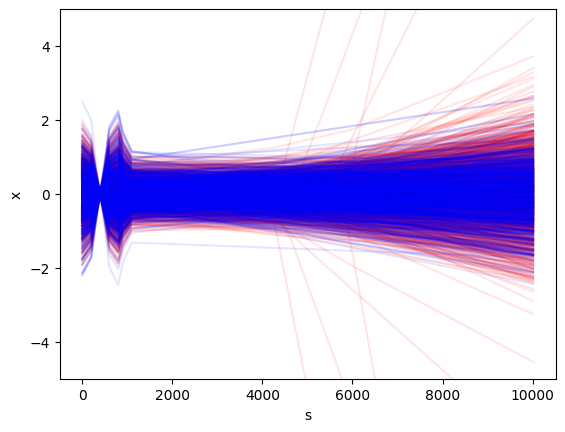

In [4]:
fig, ax = plt.subplots()

color = ['r', 'b']

i = 0
for df in [df_air, df_vac]:
    global i
    c = color[i]
    # print(c)

    data = df[['p_id','p','x','y','s']].values

    unique_ids = np.unique(data[:, 0])

    for unique_id in unique_ids:
        mask = data[:, 0] == unique_id
        p_values = data[mask, 1]
        x_values = data[mask, 2]
        y_values = data[mask, 3]
        s_values = data[mask, 4]
        
        ax.plot(s_values, x_values, c=c, alpha=0.1)
        # ax.plot(s_values, y_values, c="r", alpha=0.1)

    ax.set_xlabel('s')
    ax.set_ylabel('x')
    i +=1

lim = 5
ax.set_ylim(-lim,lim)

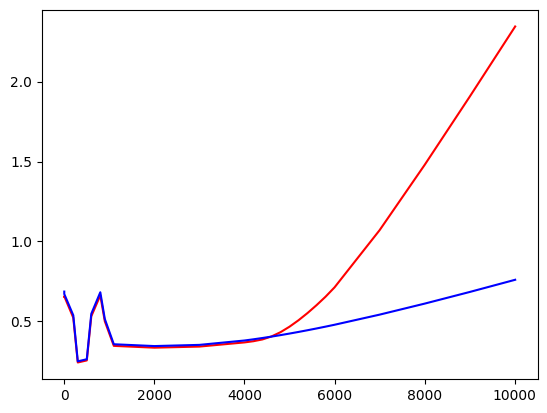

In [5]:
fig, ax = plt.subplots()

color = ['r', 'b']

i = 0
for df in [df_air, df_vac]:
    global i
    c = color[i]

    sigmaH_list = []

    for s in np.sort(df.s.unique()):
        sigma = np.abs(np.std(df.loc[df.s == s].x))
        sigmaH_list.append(sigma)


    ax.plot(np.sort(df.s.unique()), sigmaH_list, c=c)
    i+=1

In [6]:

s_list = []
sigmaH_list = []
sigmaV_list = []
scattering_type_list = []

i = 0
scattering = ["air","vacuum"]
for df in [df_air, df_vac]:
    global i
    global scattering
    c = color[i]
    scattering_type = scattering[i]

    for s in np.sort(df.s.unique()):
        sigma = np.abs(np.std(df.loc[df.s == s].x))
        sigmaH_list.append(sigma)
        sigma = np.abs(np.std(df.loc[df.s == s].y))
        sigmaV_list.append(sigma)
        scattering_type_list.append(scattering_type)
        s_list.append(s)

    i+=1

d = {'s': s_list, 'sigmaH': sigmaH_list, 'sigmaV': sigmaV_list, 'scat_type': scattering_type_list}
df = pd.DataFrame(data=d)

with open('../../fluka_beam_size.p', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

(0.0, 3.0)

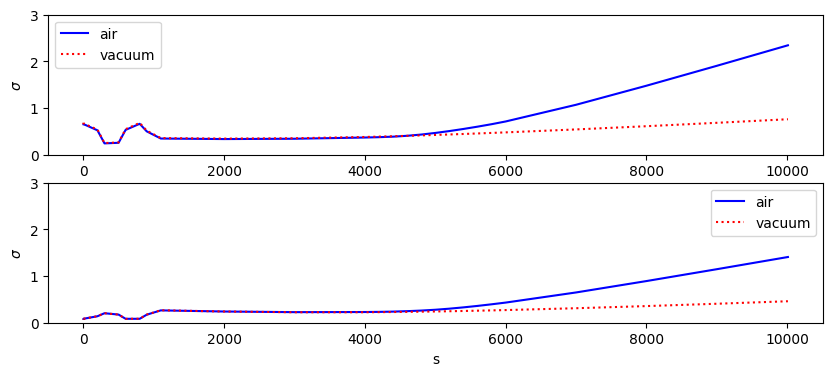

In [7]:
fig, ax = plt.subplots(2,1, figsize=(10,4))

color = ["b", "r"]
linestyle = ["-",":"]
i = 0
for scat_type in ["air", "vacuum"]:
    c = color[i]
    ls = linestyle[i]
    df_mini = df.loc[df.scat_type == scat_type]
    ax[0].plot(df_mini.s, df_mini.sigmaH, c=c, label=scat_type, ls=ls)
    ax[1].plot(df_mini.s, df_mini.sigmaV, c=c, label=scat_type, ls=ls)
    i+=1

ax[0].set_xlabel("s")
ax[0].set_ylabel(r"$\sigma$")
ax[0].legend()
ax[0].set_ylim(0, 3)

ax[1].set_xlabel("s")
ax[1].set_ylabel(r"$\sigma$")
ax[1].legend()
ax[1].set_ylim(0, 3)

In [8]:
df_mini.s.unique()

array([-1.1102e-16,  0.0000e+00,  2.0000e+02,  3.0000e+02,  5.0000e+02,
        6.0000e+02,  8.0000e+02,  9.0000e+02,  1.1000e+03,  2.0000e+03,
        3.0000e+03,  4.0000e+03,  4.2000e+03,  4.4000e+03,  4.6000e+03,
        4.8000e+03,  5.0000e+03,  5.2000e+03,  5.4000e+03,  5.6000e+03,
        5.8000e+03,  6.0000e+03,  7.0000e+03,  8.0000e+03,  9.0000e+03,
        1.0000e+04,  1.0010e+04])

In [9]:
with open('df_FLUKA_sigma.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Initial distribution

Text(0, 0.5, 'y')

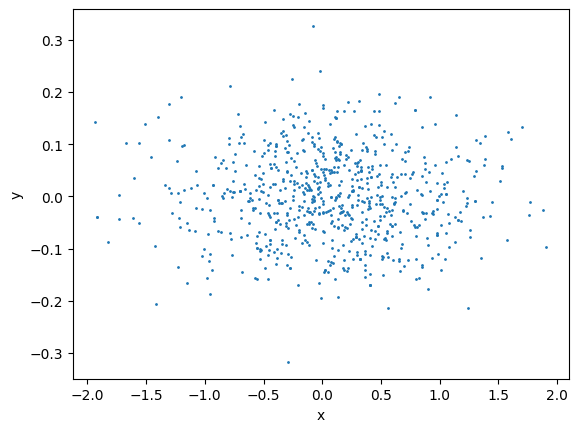

In [10]:
fig, ax = plt.subplots()
ax.scatter(df_air.loc[df_air.s == 0].x, df_air.loc[df_air.s == 0].y, s=1)
ax.set_xlabel("x")
ax.set_ylabel("y")

/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_77052/3368273153.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


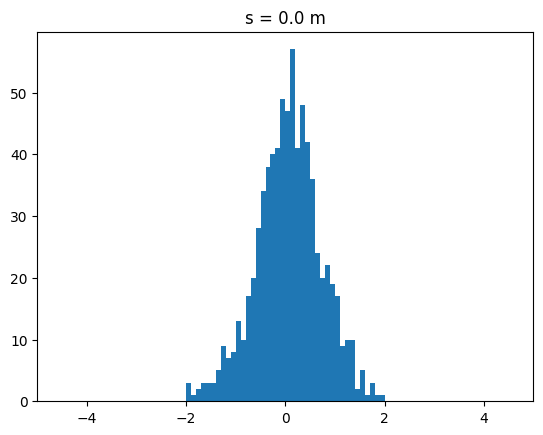

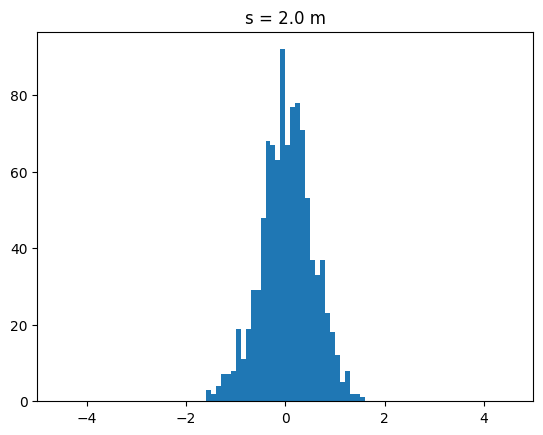

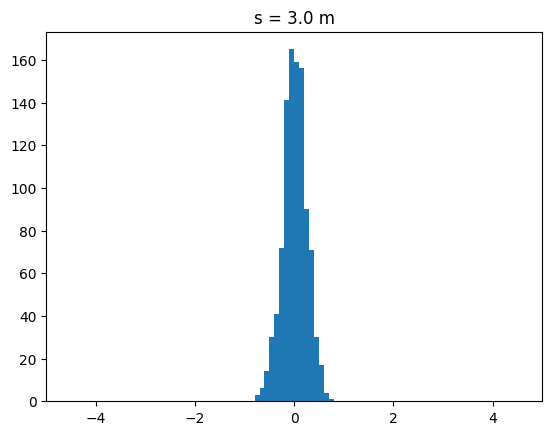

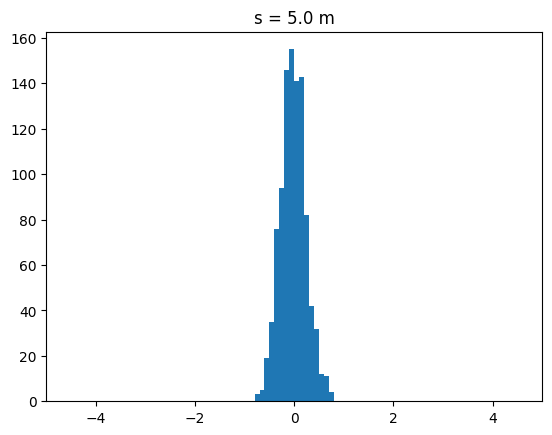

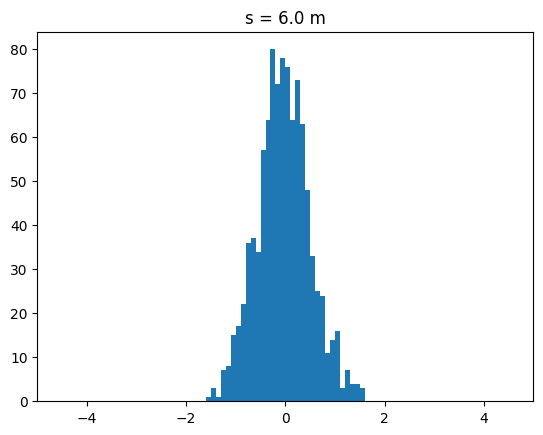

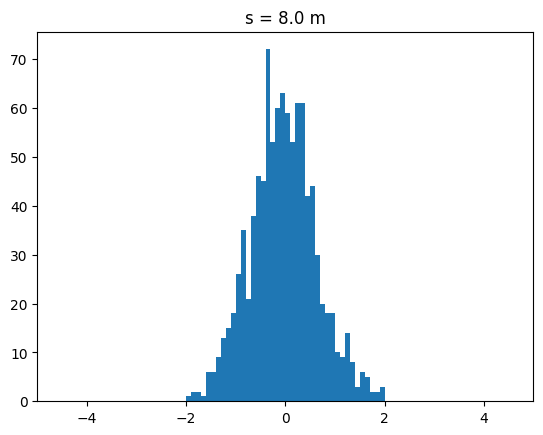

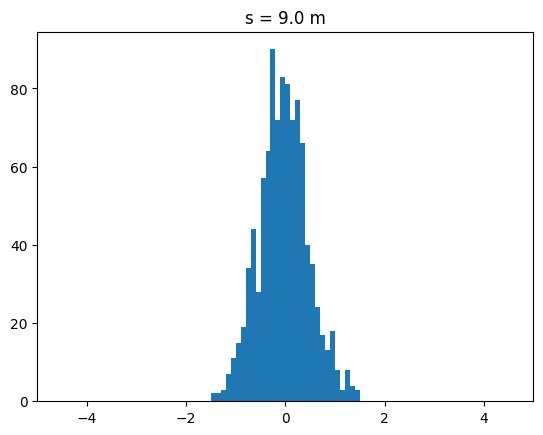

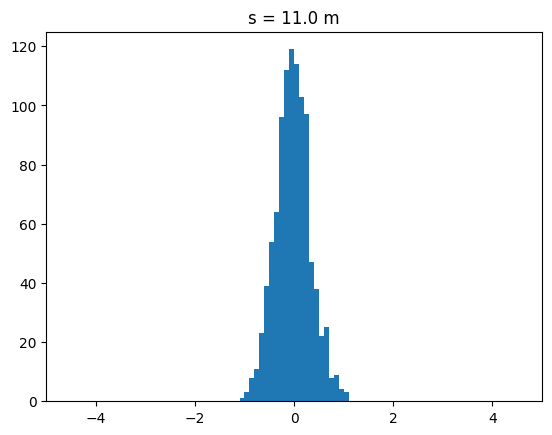

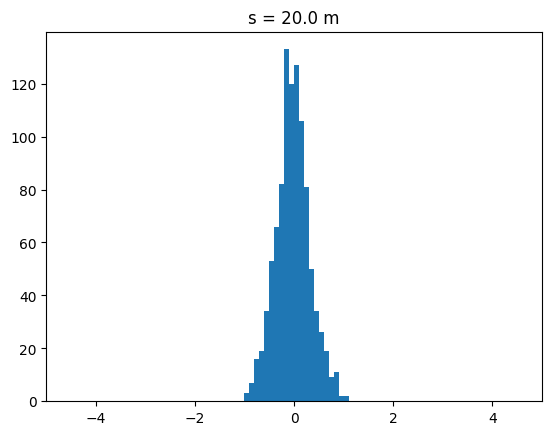

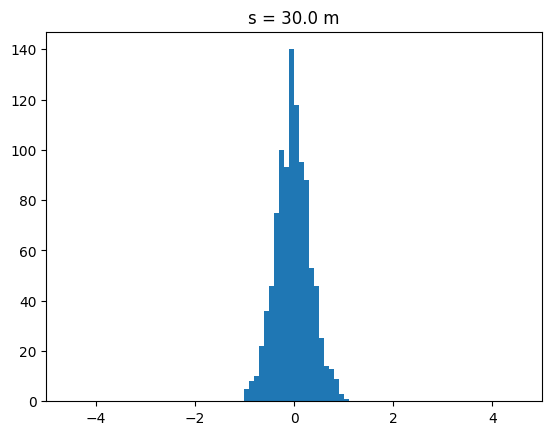

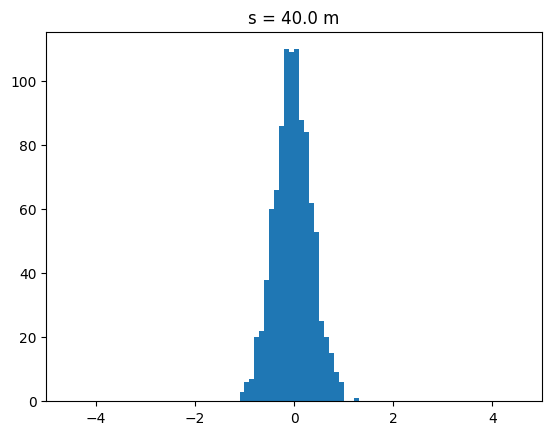

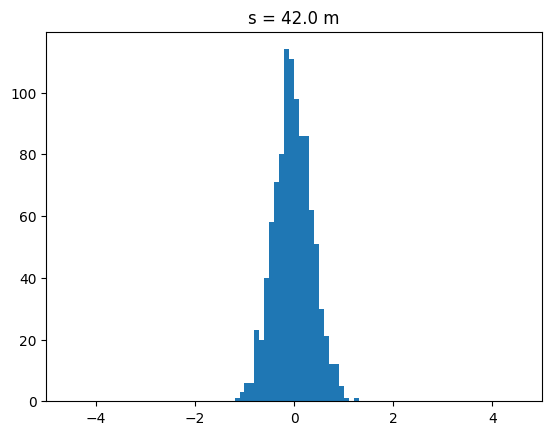

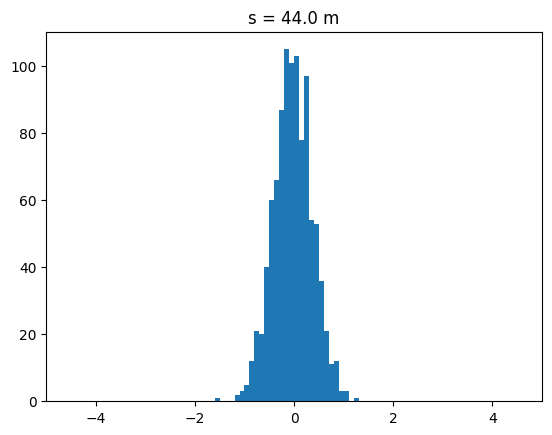

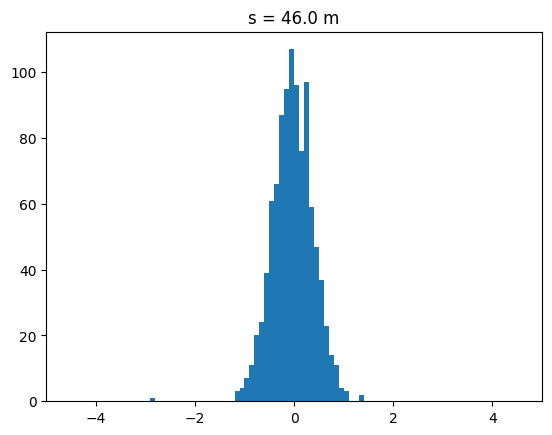

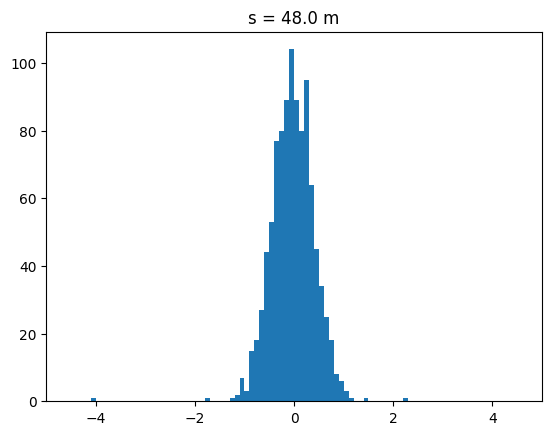

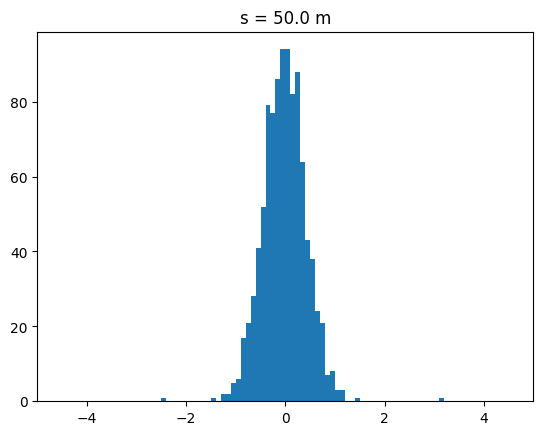

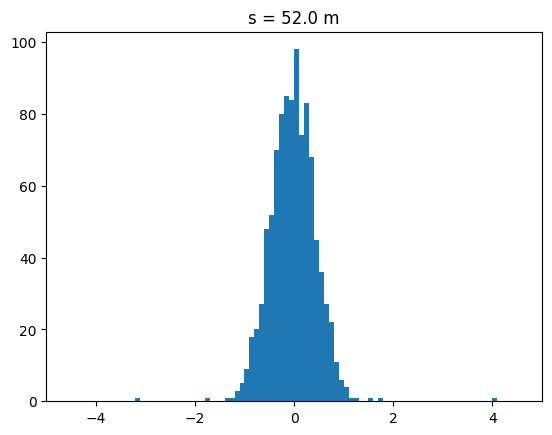

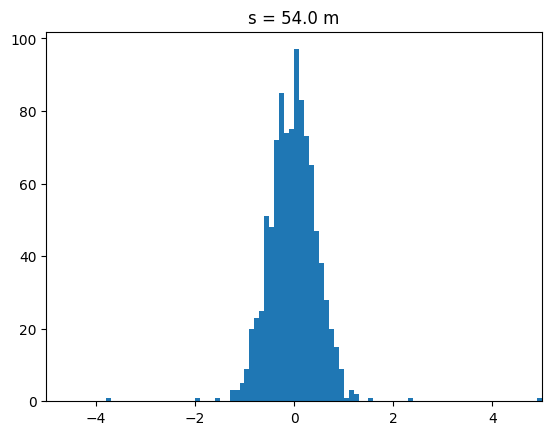

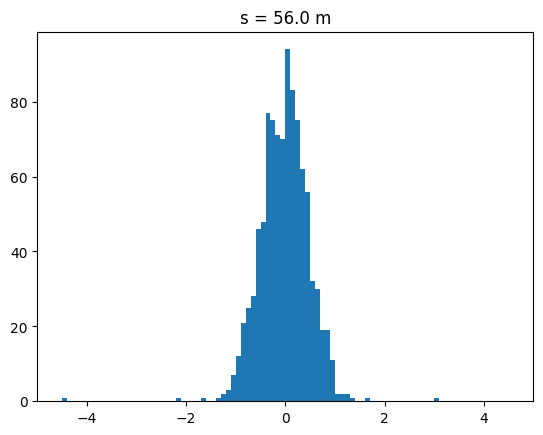

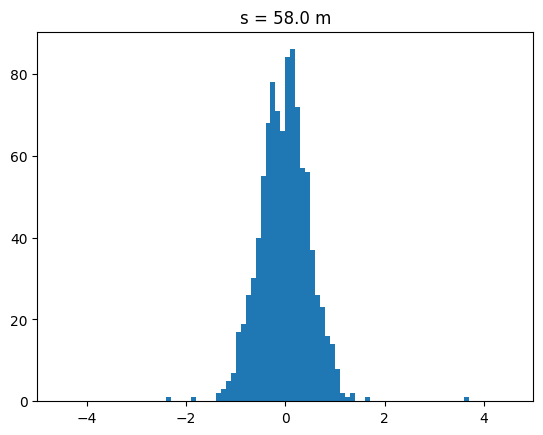

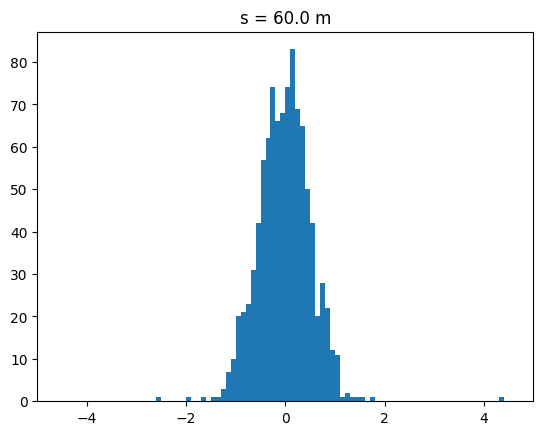

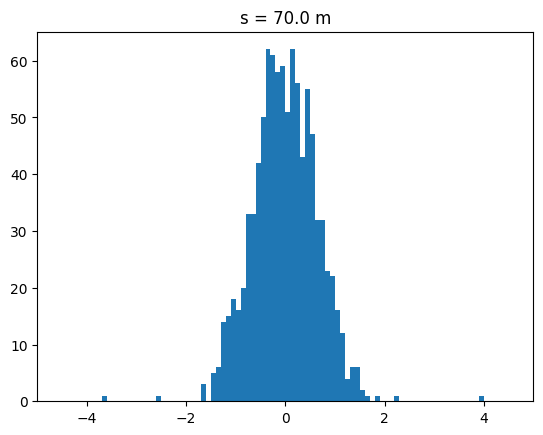

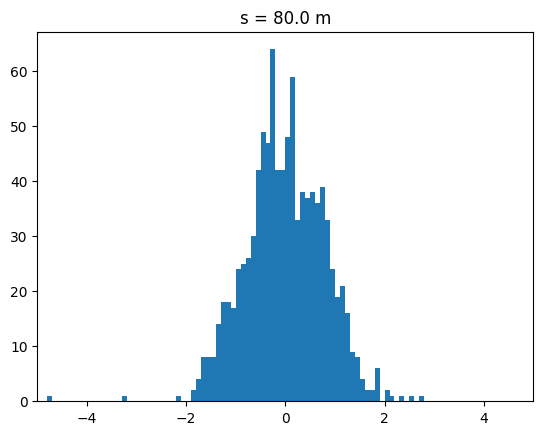

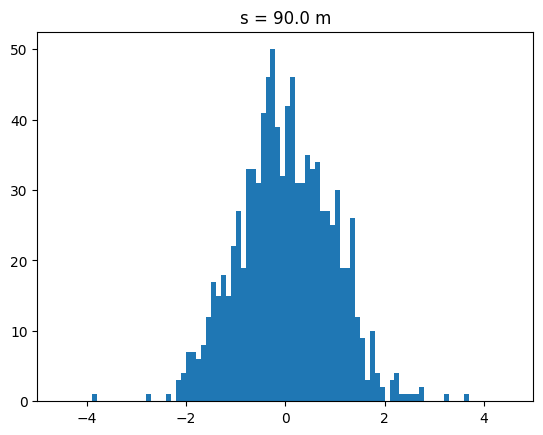

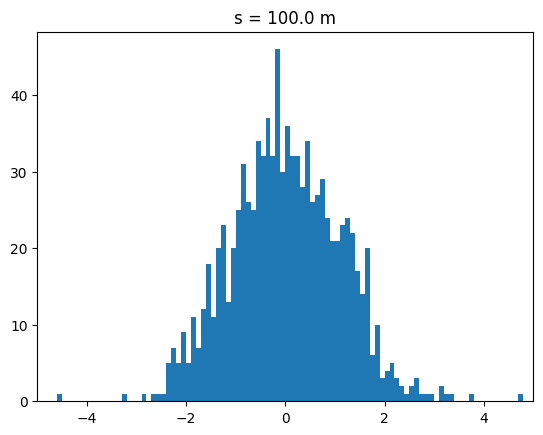

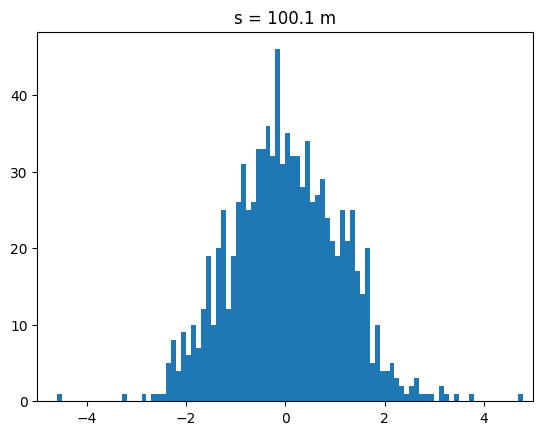

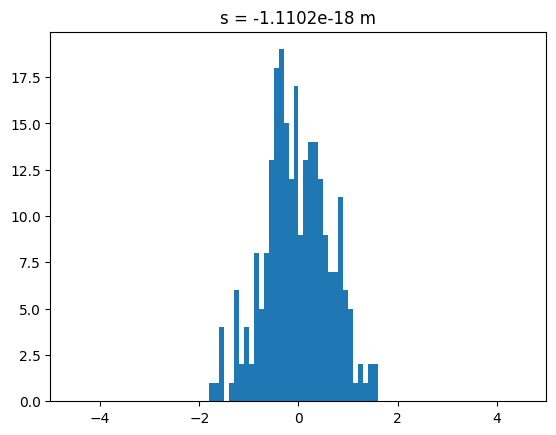

In [11]:
for s in df_air.s.unique():
    fig, ax = plt.subplots()
    ax.hist(df_air.loc[df_air.s == s].x, bins=100, range=[-5, 5]);
    ax.set_title(f"s = {s/100} m")
    ax.set_xlim(-5,5)

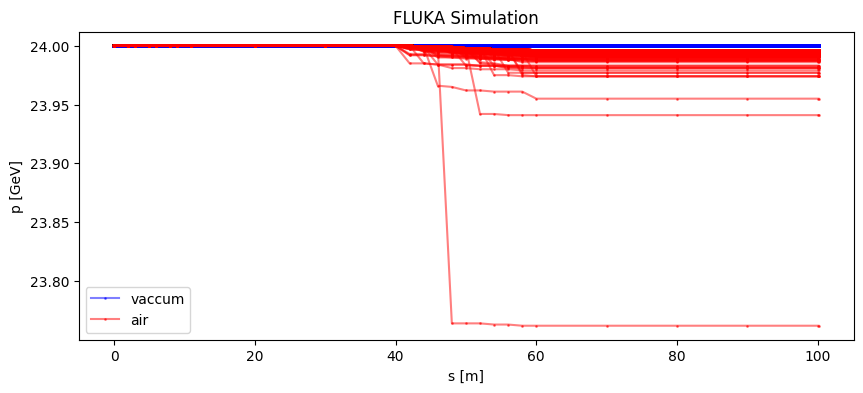

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
for p_id in df_vac.p_id.unique():
    if p_id == 0:
        label="vaccum"
    else:
        label = ""
    ax.plot(df_vac.loc[df_vac.p_id == p_id].s/100, df_vac.loc[df_vac.p_id == p_id].p, marker="o", markersize=1, alpha=0.5, c="b", label=label)
for p_id in df_air.p_id.unique():
    if p_id == 0:
        label="air"
    else:
        label = ""
    ax.plot(df_air.loc[df_air.p_id == p_id].s/100, df_air.loc[df_air.p_id == p_id].p, marker="o", markersize=1, alpha=0.5, c="r", label=label)
ax.set_ylabel("p [GeV]")
ax.set_xlabel("s [m]")
ax.set_title("FLUKA Simulation")
ax.legend()

23.999


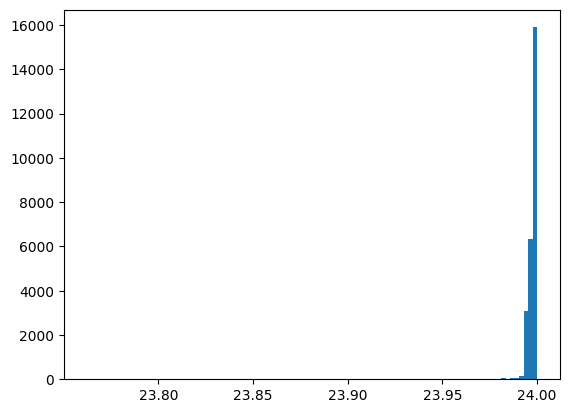

In [13]:
plt.hist(df_air.p,bins=100);
print(np.median(df_air.p))

# Open another file of FLUKA with the different air interaction ON and OFF

In [14]:
with open('airscattering.pickle', 'rb') as f:
    df = pickle.load(f)

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df.head(1)

Dist    X_air    Y_air     X_vac   Y_vac  X_intoff  Y_intoff  X_int_mcsoff  \
0   0.0  0.65836  0.08372  0.677526  0.0848  0.697937  0.083039      0.681325   

   Y_int_mcsoff  
0      0.084131

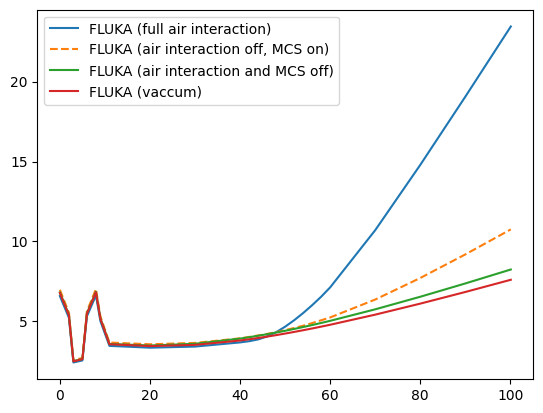

In [19]:
fig, ax = plt.subplots()
ax.plot(df.Dist, df.X_air*10, label="FLUKA (full air interaction)")
ax.plot(df.Dist, df.X_intoff*10, ls ="--", label="FLUKA (air interaction off, MCS on)")
ax.plot(df.Dist, df.X_int_mcsoff*10, label="FLUKA (air interaction and MCS off)")
ax.plot(df.Dist, df.X_vac*10, label="FLUKA (vaccum)")
ax.legend()